Import Libraries

In [1]:


import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.metrics import mean_absolute_error

from sklearn.ensemble import RandomForestRegressor



Load Dataset

In [2]:
df=pd.read_csv("Salary prediction.csv")
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [3]:
df.columns = df.columns.str.strip()

Data Cleaning

In [4]:
print(df.info())
print(df.isnull().sum())

#Fill / Drop missing values
df = df.dropna()

#Remove duplicates
df = df.drop_duplicates()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB
None
Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64


In [5]:
print(df.columns)

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')


Outlier

In [6]:
q1=df['Years of Experience'].quantile(0.25)
q3=df['Years of Experience'].quantile(0.75)
IQR=q3-q1
lower=q1-1.5*IQR
upper=q3+1.5*IQR
df[(df['Years of Experience']<lower)|(df['Years of Experience']>upper)]
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
348,28.0,Female,Bachelor's,Junior Operations Manager,1.0,35000.0
349,36.0,Male,Bachelor's,Senior Business Development Manager,8.0,110000.0
350,44.0,Female,PhD,Senior Data Scientist,16.0,160000.0
351,31.0,Male,Bachelor's,Junior Marketing Coordinator,3.0,55000.0


EDA

In [7]:
import matplotlib.pyplot as plt

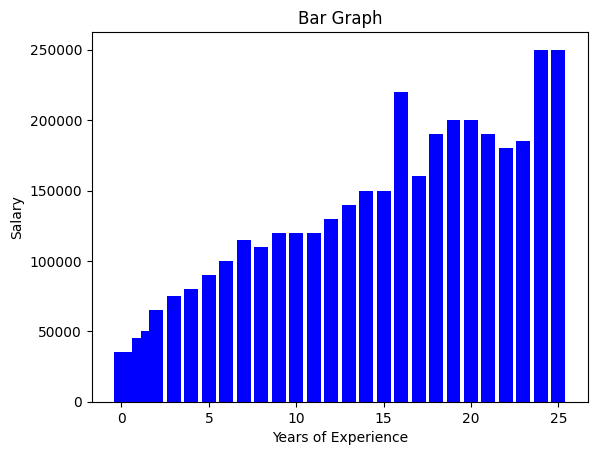

In [8]:
plt.bar(df['Years of Experience'],df['Salary'],color="blue")
plt.title("Bar Graph")
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()



In [9]:
df.describe()

,Age,Years of Experience,Salary
count,324.000000,324.000000,324.000000
mean,37.382716,10.058642,99985.648148
std,7.185844,6.650470,48652.271440
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.500000,9.000000,95000.000000
75%,44.000000,16.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [10]:
df["Job Title"].value_counts

<bound method IndexOpsMixin.value_counts of 0                        Software Engineer
1                             Data Analyst
2                           Senior Manager
3                          Sales Associate
4                                 Director
                      ...                 
348              Junior Operations Manager
349    Senior Business Development Manager
350                  Senior Data Scientist
351           Junior Marketing Coordinator
371                 Director of Operations
Name: Job Title, Length: 324, dtype: object>

Encoder (Job title)

In [11]:
x=df.drop('Salary',axis=1) #new dataframe with deleted salary, original dataframe is same
y=df['Salary'] #salary into new variable

categorical_cols=["Gender","Education Level","Job Title"]

In [12]:
encoder=OrdinalEncoder()

In [13]:
X_encoder=x.copy()
X_encoder[categorical_cols]=encoder.fit_transform(x[categorical_cols])
X_encoder

,Age,Gender,Education Level,Job Title,Years of Experience
0,32.0,1.0,0.0,159.0,5.0
1,28.0,0.0,1.0,17.0,3.0
2,45.0,1.0,2.0,130.0,15.0
3,36.0,0.0,0.0,101.0,7.0
4,52.0,1.0,1.0,22.0,20.0
...,...,...,...,...,...
348,28.0,0.0,0.0,68.0,1.0
349,36.0,1.0,0.0,111.0,8.0
350,44.0,0.0,2.0,115.0,16.0
351,31.0,1.0,0.0,63.0,3.0


In [14]:
X_encoder["Job Title"].unique()

array([159.,  17., 130., 101.,  22.,  81.,  93., 104.,  82., 150., 158.,
        40.,  36.,  96.,  13.,  89.,  83., 116.,  18., 102.,   3., 172.,
        44.,  98.,  37., 157., 160.,  57., 112.,  92.,   6.,   1.,  19.,
        84., 167.,  39.,  95.,  16., 103., 169.,  88.,  85.,   2., 162.,
        10.,   0.,  29.,  41.,  12.,   5.,  34., 171.,  38., 170., 156.,
        30., 115.,  47.,  21.,  43.,  14.,   4., 118., 173.,  99., 166.,
        11., 153.,  42.,   9., 165., 106.,   8.,  56.,  35.,  46., 144.,
        91., 164., 134., 168., 100.,  76.,  97.,  87.,  94., 122.,  80.,
       143.,   7.,  20.,  45., 131.,  15., 120., 161., 163., 110.,  62.,
        86.,  90.,  61., 141.,  66., 121., 105., 152.,  79., 154., 146.,
        73.,  64.,  54., 142.,  49., 148.,  65.,  70., 109.,  32.,  71.,
       111., 139.,  53., 129.,  59., 138.,  28.,  77., 149.,  31.,  52.,
       132., 125.,  50., 108., 147.,  60.,  25.,  63.,  55., 136., 124.,
       155.,  69., 135., 128., 145.,  33., 107.,  2

Train-Test Split

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X_encoder,y,test_size=0.3,random_state=42)


In [16]:
print(X_train.shape)

(226, 5)


Random Forest Regressor

In [17]:
rf=RandomForestRegressor()

In [18]:
rf.fit(X_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [19]:
import joblib
feature_names_list = list(X_train.columns)
joblib.dump(feature_names_list, 'feature_names.pkl')

joblib.dump(encoder, 'encoder.pkl') 

print("('feature_names.pkl')('encoder.pkl')")


('feature_names.pkl')('encoder.pkl')


In [20]:
rf_pred=rf.predict(X_test)


In [21]:
rf_pred

array([105950.        , 114950.        ,  49150.        , 116400.        ,
        99050.        , 101121.42857143,  48500.        ,  53650.        ,
       170500.        ,  46250.        ,  40000.        , 122450.        ,
       106250.        , 152900.        ,  98700.        , 175950.        ,
       106600.        ,  94550.        ,  55250.        ,  42600.        ,
        90466.66666667,  61250.        ,  55600.        ,  56950.        ,
       159850.        ,  95500.        , 149650.        , 167700.        ,
       161400.        ,  37700.        ,  95050.        , 176300.        ,
       107850.        , 149700.        , 140650.        ,  46150.        ,
        86450.        ,  65050.        ,  89450.        ,  35850.        ,
       109100.        ,  49950.        , 110900.        ,  55733.33333333,
        40850.        ,  48900.        , 119750.        ,  39950.        ,
       152050.        ,  86250.        , 146150.        ,  40750.        ,
        60850.        ,  

In [22]:
rf_mean=mean_absolute_error(y_test,rf_pred)   #mean error

In [23]:
rf_mean

9419.455782312925

In [24]:
import pickle

In [25]:
pickle.dump(encoder, open("encoder.pkl", "wb"))

In [26]:
pickle.dump(rf, open('rf.pkl','wb'))